In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import scipy.integrate as integrate
from matplotlib.patches import Rectangle 
import scipy.special as sp
import matplotlib.patches as patches
from IPython.display import Image
import seaborn as sns
%matplotlib inline

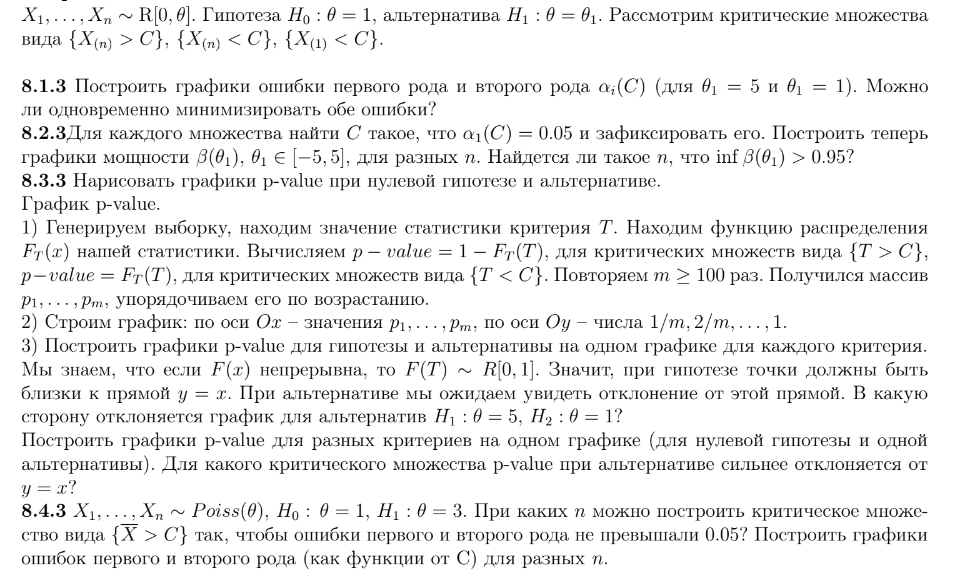

In [5]:
display(Image(filename='task_8.png', width = 800))

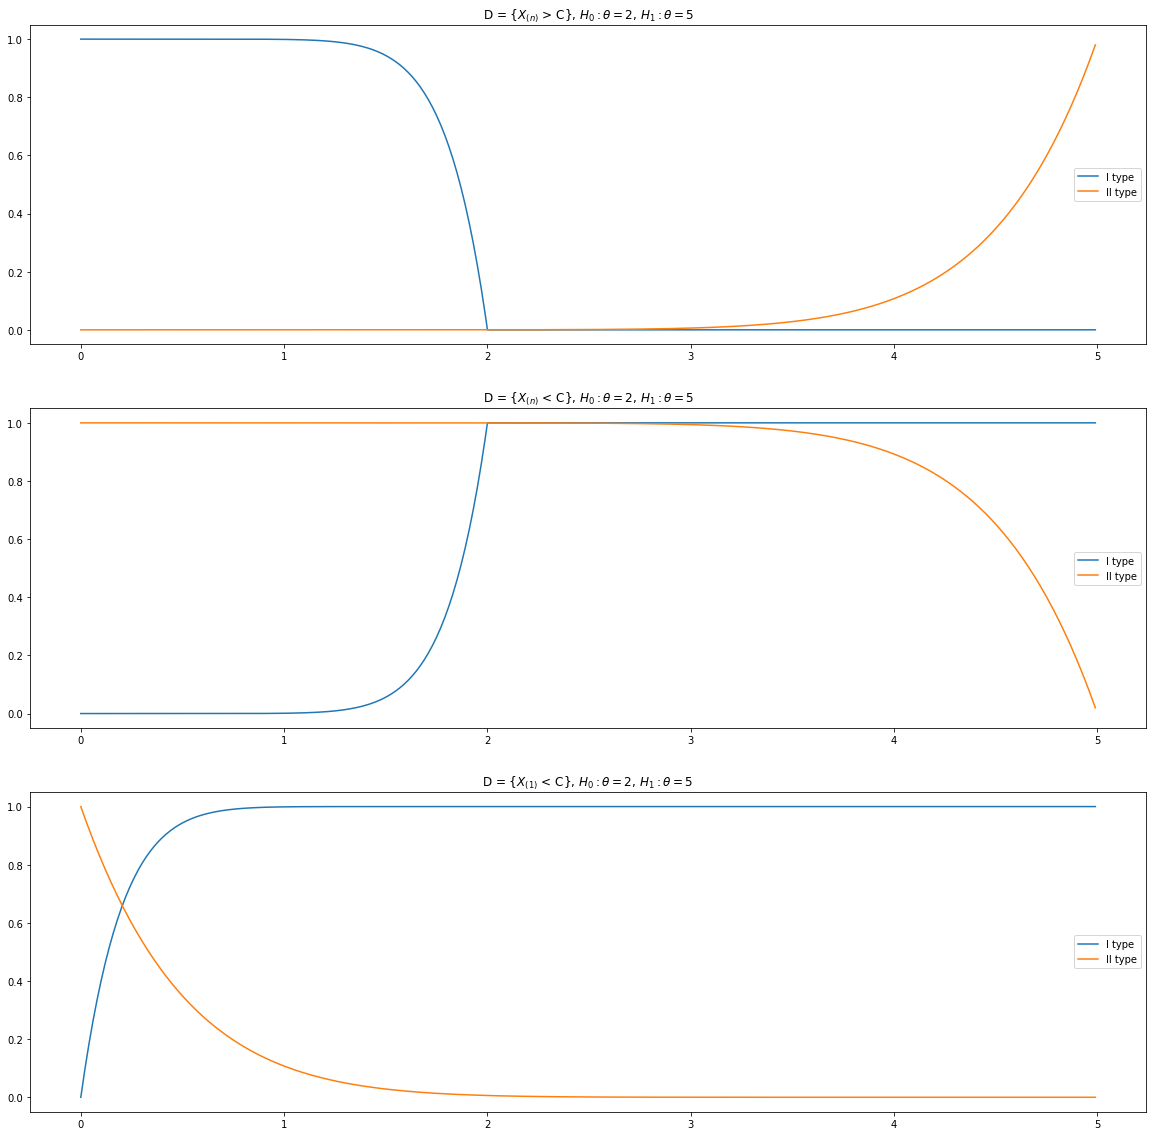

In [3]:
theta = 2
theta1 = 5
n = 10

x = np.arange(0, np.maximum(theta, theta1), 0.01)

plt.figure(figsize = (20, 20))

# {X_(n) > C}
plt.subplot(3, 1, 1)
y = list(map(lambda x: 1-(sts.uniform.cdf(x, scale = theta))**n, x))
y1 = list(map(lambda x: (sts.uniform.cdf(x, scale = theta1))**n, x))
plt.plot(x, y, x, y1)
plt.legend(["I type", "II type"])
plt.title("D = {$X_{(n)}$ > C}, $H_0: \\theta = $" + str(theta) + ", $H_1: \\theta = $" + str(theta1))

# {X_(n) < C}
plt.subplot(3, 1, 2)
y = list(map(lambda x: (sts.uniform.cdf(x, scale = theta))**n, x))
y1 = list(map(lambda x: 1-(sts.uniform.cdf(x, scale = theta1))**n, x))
plt.plot(x, y, x, y1)
plt.legend(["I type", "II type"])
plt.title("D = {$X_{(n)}$ < C}, $H_0: \\theta = $" + str(theta) + ", $H_1: \\theta = $" + str(theta1))

# {X_(1) < C}
plt.subplot(3, 1, 3)
y = list(map(lambda x: 1-(1-sts.uniform.cdf(x, scale = theta))**n, x))
y1 = list(map(lambda x: (1-sts.uniform.cdf(x, scale = theta1))**n, x))
plt.plot(x, y, x, y1)
plt.legend(["I type", "II type"])
plt.title("D = {$X_{(1)}$ < C}, $H_0: \\theta = $" + str(theta) + ", $H_1: \\theta = $" + str(theta1))

plt.show()

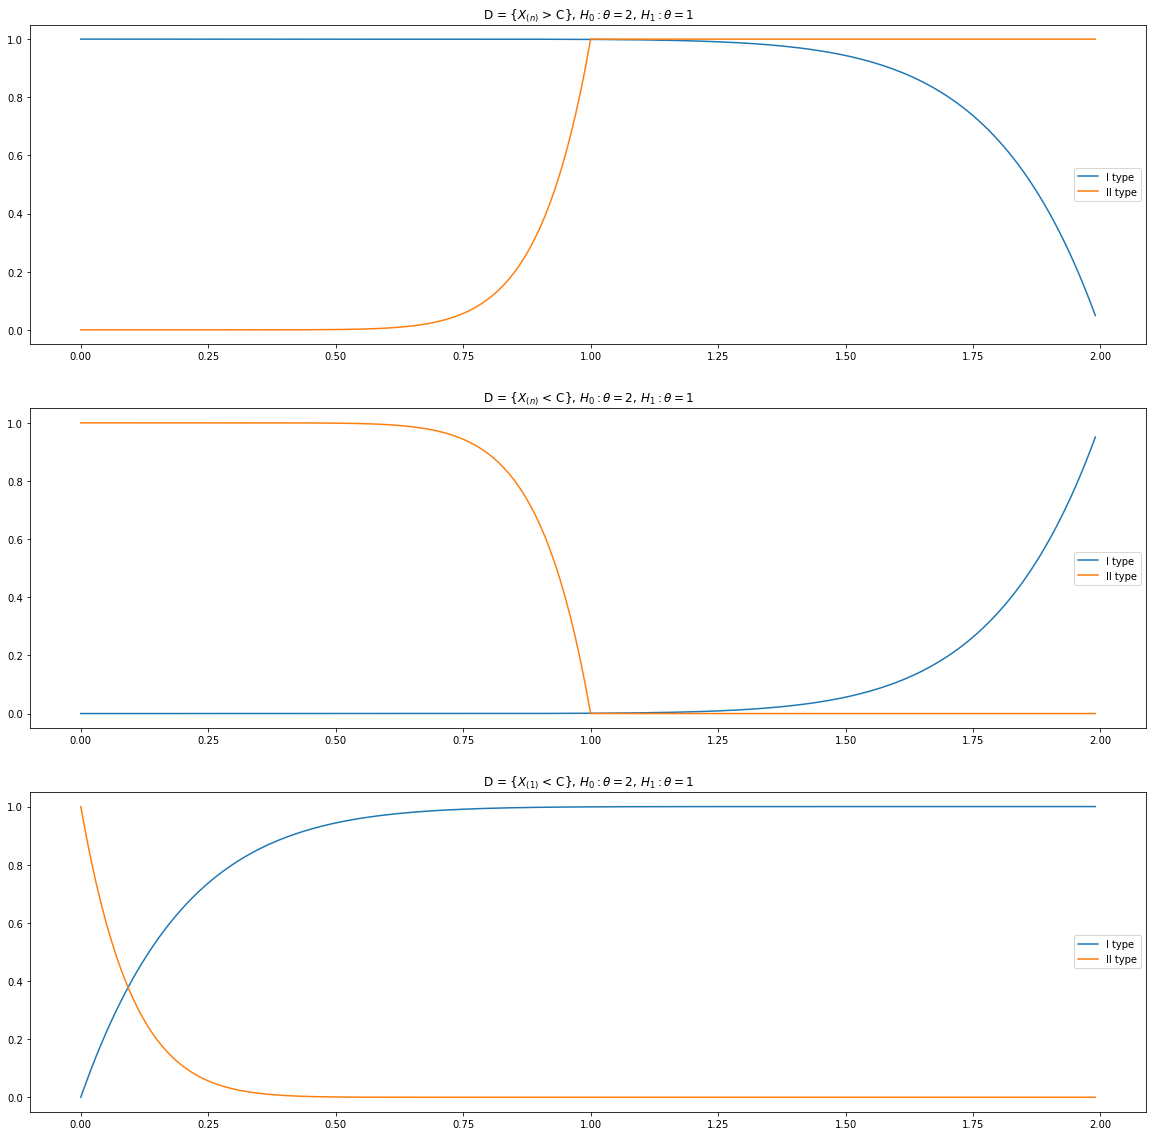

In [4]:
theta = 2
theta1 = 1
n = 10

x = np.arange(0, np.maximum(theta, theta1), 0.01)

plt.figure(figsize = (20, 20))

# {X_(n) > C}
plt.subplot(3, 1, 1)
y = list(map(lambda x: 1-(sts.uniform.cdf(x, scale = theta))**n, x))
y1 = list(map(lambda x: (sts.uniform.cdf(x, scale = theta1))**n, x))
plt.plot(x, y, x, y1)
plt.legend(["I type", "II type"])
plt.title("D = {$X_{(n)}$ > C}, $H_0: \\theta = $" + str(theta) + ", $H_1: \\theta = $" + str(theta1))

# {X_(n) < C}
plt.subplot(3, 1, 2)
y = list(map(lambda x: (sts.uniform.cdf(x, scale = theta))**n, x))
y1 = list(map(lambda x: 1-(sts.uniform.cdf(x, scale = theta1))**n, x))
plt.plot(x, y, x, y1)
plt.legend(["I type", "II type"])
plt.title("D = {$X_{(n)}$ < C}, $H_0: \\theta = $" + str(theta) + ", $H_1: \\theta = $" + str(theta1))

# {X_(1) < C}
plt.subplot(3, 1, 3)
y = list(map(lambda x: 1-(1-sts.uniform.cdf(x, scale = theta))**n, x))
y1 = list(map(lambda x: (1-sts.uniform.cdf(x, scale = theta1))**n, x))
plt.plot(x, y, x, y1)
plt.legend(["I type", "II type"])
plt.title("D = {$X_{(1)}$ < C}, $H_0: \\theta = $" + str(theta) + ", $H_1: \\theta = $" + str(theta1))

plt.show()

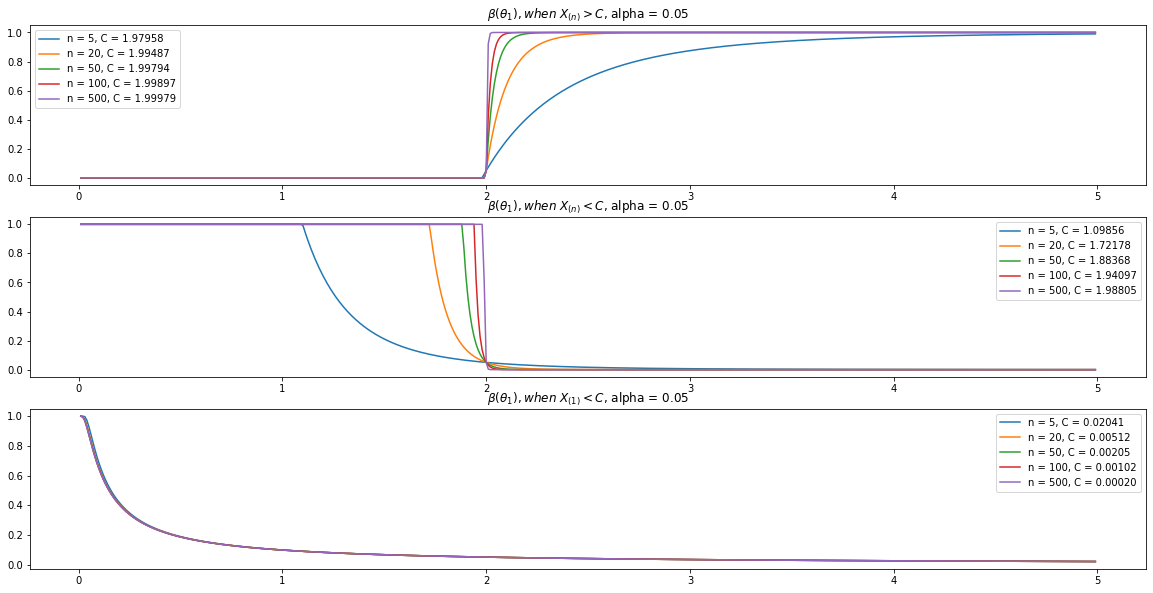

In [7]:
theta = 2
alpha = 0.05

theta1 = np.arange(-5, 5, 0.01)

plt.figure(figsize = (20, 10))

N = [5, 20, 50, 100, 500]

# {X_(n) > C}
plt.subplot(3, 1, 1)
legend = []
for i in range(len(N)):
    C1 = sts.uniform.ppf((1-alpha)**(1/N[i]), loc = 0, scale = theta)
    beta = list(map(lambda theta1: 1-(sts.uniform.cdf(C1, loc = 0, scale = theta1))**N[i], theta1))
    plt.plot(theta1, beta)
    legend.append("n = " + str(N[i])+", C = " + str(C1)[:7])
plt.title("$\\beta(\\theta_1), when$ $X_{(n)}>C$, alpha = "+str(alpha))
plt.legend(legend)

legend = []
# {X_(n) < C}
plt.subplot(3, 1, 2)
legend = []
for i in range(len(N)):
    C1 = sts.uniform.ppf((alpha)**(1/N[i]), loc = 0, scale = theta)
    beta = list(map(lambda theta1: (sts.uniform.cdf(C1, loc = 0, scale = theta1))**N[i], theta1))
    plt.plot(theta1, beta)
    legend.append("n = " + str(N[i])+", C = " + str(C1)[:7])
plt.title("$\\beta(\\theta_1), when$ $X_{(n)}<C$, alpha = "+str(alpha))
plt.legend(legend)

legend = []
# {X_(1) < C}
plt.subplot(3, 1, 3)
legend = []
for i in range(len(N)):
    C1 = sts.uniform.ppf(1-(1-alpha)**(1/N[i]), loc = 0, scale = theta)
    beta = list(map(lambda theta1: 1-(1-sts.uniform.cdf(C1, loc = 0, scale = theta1))**N[i], theta1))
    plt.plot(theta1, beta)
    legend.append("n = " + str(N[i])+", C = " + str(C1)[:7])
plt.title("$\\beta(\\theta_1), when$ $X_{(1)}<C$, alpha = "+str(alpha))
plt.legend(legend)

plt.show()

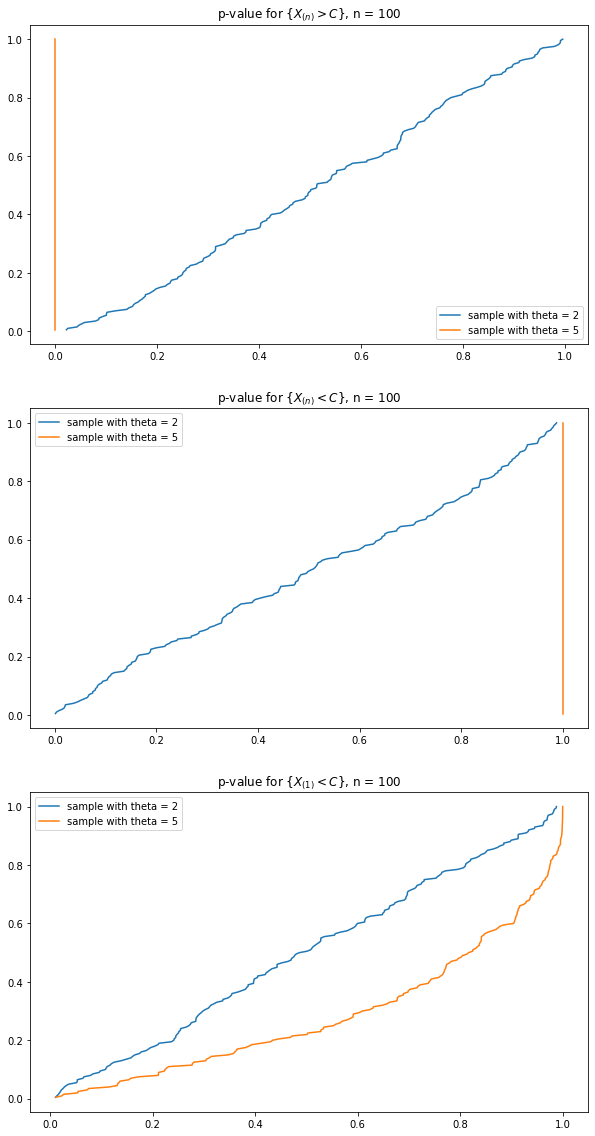

In [14]:
theta = 2
theta1 = 5
n = 100
m = 200
P0 = []
P1 = []
plt.figure(figsize = (10, 20))

y = np.arange(1, m+1, 1)/m
# {X_(n) > C}
for i in range(m):
    X = sts.uniform.rvs(loc = 0, scale = theta, size = n)
    T = np.max(X)
    P0.append(1 - (sts.uniform.cdf(T, loc = 0, scale = theta))**n)
    P0.sort()
    X = sts.uniform.rvs(loc = 0, scale = theta1, size = n)
    T = np.max(X)
    P1.append(1 - (sts.uniform.cdf(T, loc = 0, scale = theta))**n)
    P1.sort()

plt.subplot(3, 1, 1)
plt.plot(P0, y, P1, y)
plt.title("p-value for {$X_{(n)} > C$}, n = " + str(n))
plt.legend(["sample with theta = " + str(theta), "sample with theta = " + str(theta1)])

P0 = []
P1 = []
# {X_(n) < C}
for i in range(m):
    X = sts.uniform.rvs(loc = 0, scale = theta, size = n)
    T = np.max(X)
    P0.append((sts.uniform.cdf(T, loc = 0, scale = theta))**n)
    P0.sort()
    X = sts.uniform.rvs(loc = 0, scale = theta1, size = n)
    T = np.max(X)
    P1.append((sts.uniform.cdf(T, loc = 0, scale = theta))**n)
    P1.sort()

plt.subplot(3, 1, 2)
plt.plot(P0, y, P1, y)
plt.title("p-value for {$X_{(n)} < C$}, n = " + str(n))
plt.legend(["sample with theta = " + str(theta), "sample with theta = " + str(theta1)])

P0 = []
P1 = []
# {X_(1) < C}
for i in range(m):
    X = sts.uniform.rvs(loc = 0, scale = theta, size = n)
    T = np.min(X)
    P0.append(1 - (1-sts.uniform.cdf(T, loc = 0, scale = theta))**n)
    P0.sort()
    X = sts.uniform.rvs(loc = 0, scale = theta1, size = n)
    T = np.min(X)
    P1.append(1 - (1-sts.uniform.cdf(T, loc = 0, scale = theta))**n)
    P1.sort()

plt.subplot(3, 1, 3)
plt.plot(P0, y, P1, y)
plt.title("p-value for {$X_{(1)} < C$}, n = " + str(n))
plt.legend(["sample with theta = " + str(theta), "sample with theta = " + str(theta1)])


plt.show()

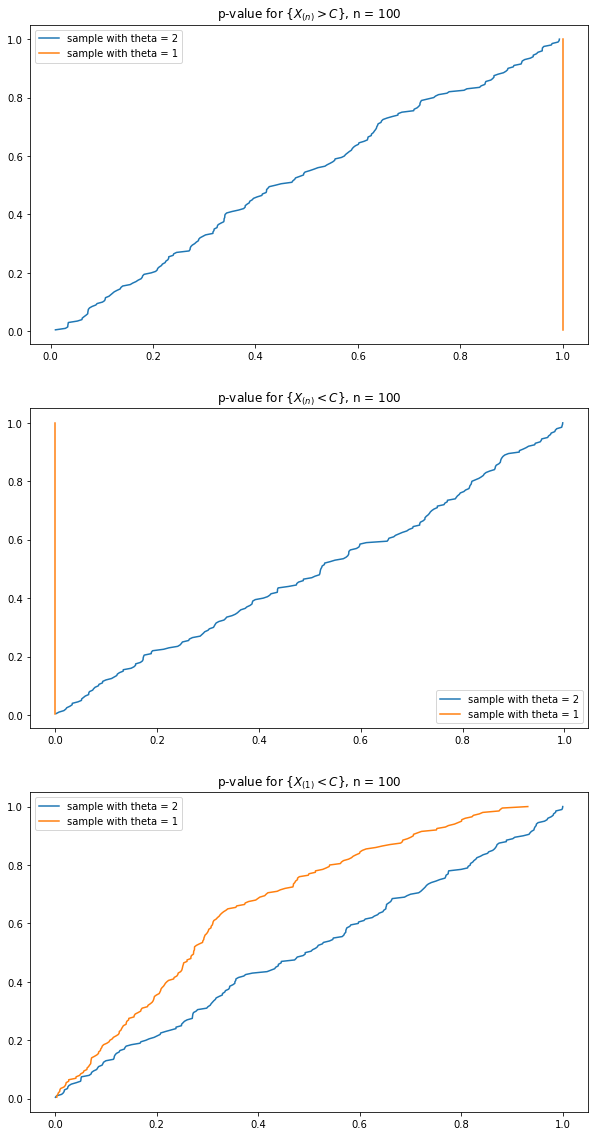

In [16]:
theta = 2
theta1 = 1
n = 100
m = 200
P0 = []
P1 = []
plt.figure(figsize = (10, 20))

y = np.arange(1, m+1, 1)/m
# {X_(n) > C}
for i in range(m):
    X = sts.uniform.rvs(loc = 0, scale = theta, size = n)
    T = np.max(X)
    P0.append(1 - (sts.uniform.cdf(T, loc = 0, scale = theta))**n)
    P0.sort()
    X = sts.uniform.rvs(loc = 0, scale = theta1, size = n)
    T = np.max(X)
    P1.append(1 - (sts.uniform.cdf(T, loc = 0, scale = theta))**n)
    P1.sort()

plt.subplot(3, 1, 1)
plt.plot(P0, y, P1, y)
plt.title("p-value for {$X_{(n)} > C$}, n = " + str(n))
plt.legend(["sample with theta = " + str(theta), "sample with theta = " + str(theta1)])

P0 = []
P1 = []
# {X_(n) < C}
for i in range(m):
    X = sts.uniform.rvs(loc = 0, scale = theta, size = n)
    T = np.max(X)
    P0.append((sts.uniform.cdf(T, loc = 0, scale = theta))**n)
    P0.sort()
    X = sts.uniform.rvs(loc = 0, scale = theta1, size = n)
    T = np.max(X)
    P1.append((sts.uniform.cdf(T, loc = 0, scale = theta))**n)
    P1.sort()

plt.subplot(3, 1, 2)
plt.plot(P0, y, P1, y)
plt.title("p-value for {$X_{(n)} < C$}, n = " + str(n))
plt.legend(["sample with theta = " + str(theta), "sample with theta = " + str(theta1)])

P0 = []
P1 = []
# {X_(1) < C}
for i in range(m):
    X = sts.uniform.rvs(loc = 0, scale = theta, size = n)
    T = np.min(X)
    P0.append(1 - (1-sts.uniform.cdf(T, loc = 0, scale = theta))**n)
    P0.sort()
    X = sts.uniform.rvs(loc = 0, scale = theta1, size = n)
    T = np.min(X)
    P1.append(1 - (1-sts.uniform.cdf(T, loc = 0, scale = theta))**n)
    P1.sort()

plt.subplot(3, 1, 3)
plt.plot(P0, y, P1, y)
plt.title("p-value for {$X_{(1)} < C$}, n = " + str(n))
plt.legend(["sample with theta = " + str(theta), "sample with theta = " + str(theta1)])


plt.show()

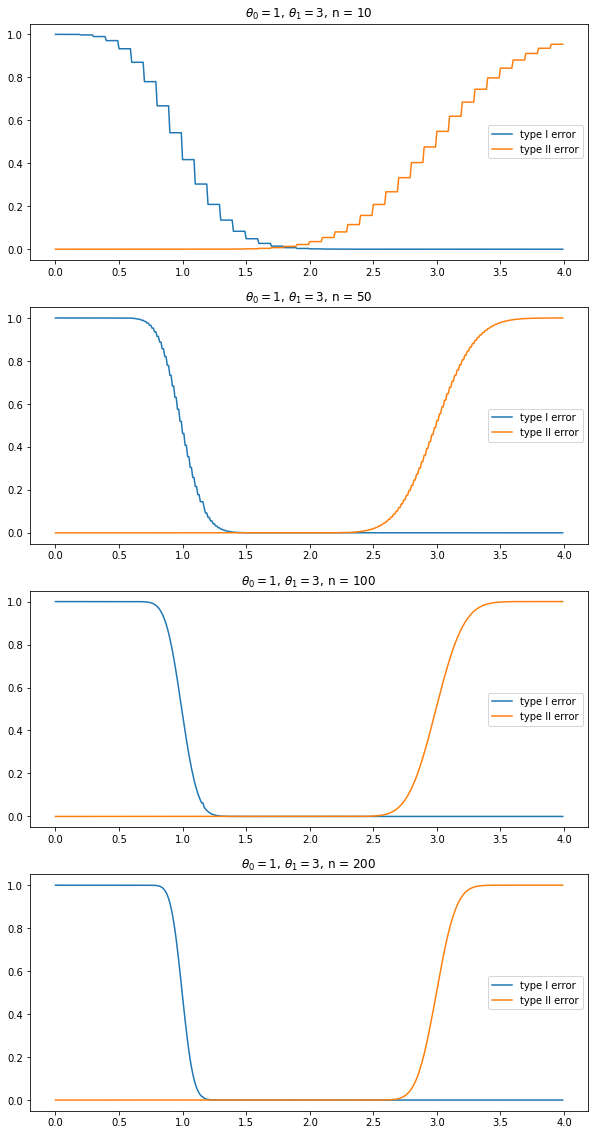

In [17]:
theta = 1
theta1 = 3

def I(n, C):
    return 1 - sts.poisson.cdf(n*C, n*theta)
    

def II(n, C):
    return sts.poisson.cdf(n*C, n*theta1)

plt.figure(figsize = (10, 20))
C = np.arange(0, np.maximum(theta, theta1)+1, 0.01)
N = [10, 50, 100, 200]

for i in range(len(N)):
    plt.subplot(len(N), 1, i+1)
    y_I = list(map(lambda c: I(N[i], c), C))
    y_II = list(map(lambda c: II(N[i], c), C))
    plt.plot(C, y_I, C, y_II)
    plt.title("$\\theta_0 = $" + str(theta) + ", $\\theta_1 = $" + str(theta1) + ", n = " + str(N[i]))
    plt.legend(["type I error", "type II error"])